<a href="https://colab.research.google.com/github/liviaceciliags/GoldFever/blob/main/train_yolov10n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)
[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/YOLO-ARENA)

YOLOv10 is a new generation in the YOLO series for real-time end-to-end object detection. It aims to improve both the performance and efficiency of YOLOs by eliminating the need for non-maximum suppression (NMS) and optimizing model architecture comprehensively. This advancement reduces computational overhead, enhancing both efficiency and capability. YOLOv10 shows state-of-the-art performance and efficiency, with YOLOv10-S being 1.8 times faster than RT-DETR-R18 and having significantly fewer parameters and FLOPs. Additionally, YOLOv10-B demonstrates 46% less latency and 25% fewer parameters compared to YOLOv9-C while maintaining the same performance.

<p align="center">
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_latency.svg" width=48%>
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_params.svg" width=48%> <br>
  Comparisons with others in terms of latency-accuracy (left) and size-accuracy (right) trade-offs.
</p>

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jun 30 00:04:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd /content/drive/MyDrive/LiviaCecilia/yolov10
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/LiviaCecilia/yolov10
/content/drive/MyDrive/LiviaCecilia/yolov10


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.5 MB/s eta 0:00:00


**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [ ]:
!pip install -q supervision roboflow
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.9 MB/s eta 0:00:00


## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 9.2G
-rw------- 1 root root  80M May 26  2024 yolov10b.pt
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.1
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.10
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.11
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.12
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.13
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.14
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.15
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.16
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.17
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.18
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.19
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.2
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.20
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.21
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.22
-rw------- 1 root root  80M May 26  2024 yolov10b.pt.3
-rw------- 1 root root  80M May 26  2024 yo

## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [ ]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 520K
-rw------- 1 root root 104K Jun  2  2023 dog.jpeg
-rw------- 1 root root 104K Jun  2  2023 dog.jpeg.1
-rw------- 1 root root 104K Jun  2  2023 dog.jpeg.2
-rw------- 1 root root 104K Jun  2  2023 dog.jpeg.3
-rw------- 1 root root 104K Jun  2  2023 dog.jpeg.4


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

/content/drive/MyDrive/LiviaCecilia/yolov10
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_

**NONE:** Let's display result.

/content/drive/MyDrive/LiviaCecilia/yolov10


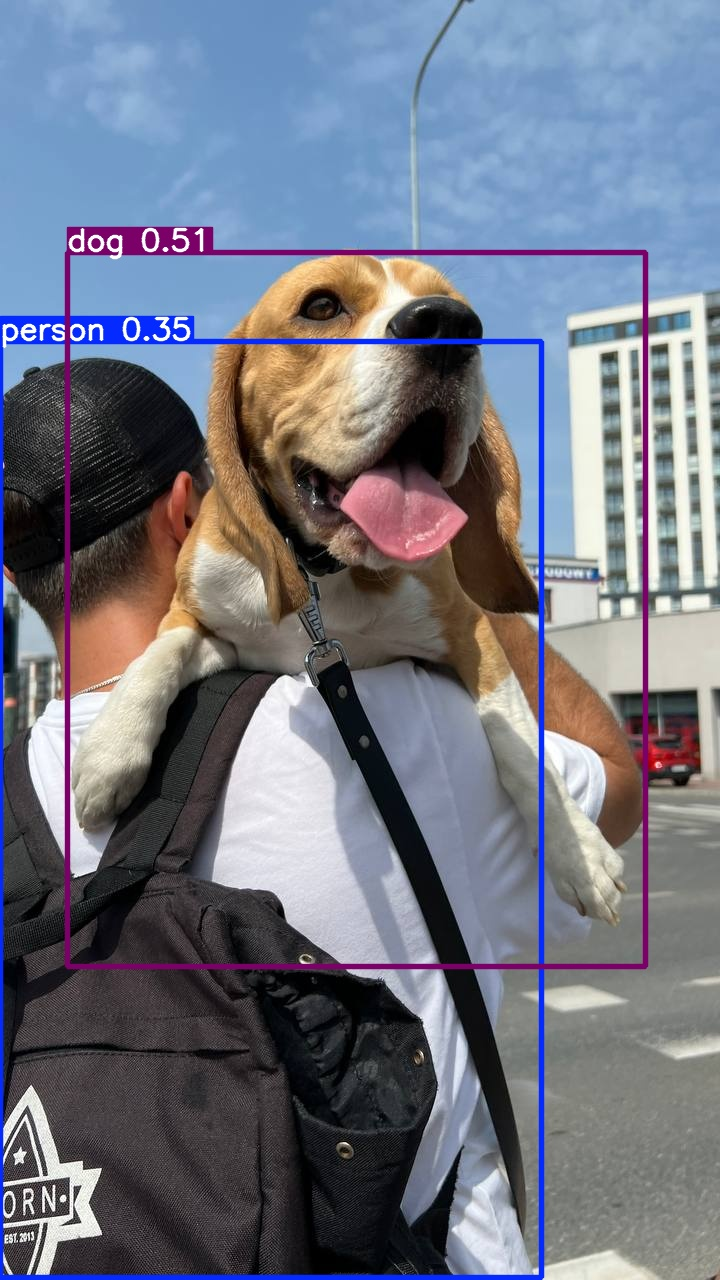

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename='/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/predict6/dog.jpg', height=600)

### 🐍 Python SDK

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)

TypeError: __main__.<lambda>() got multiple values for keyword argument 'weights_only'

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

**NONE:** Let's display result using `supervision`.

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/dog.jpeg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [ ]:
import torch
from roboflow import Roboflow
from google.colab import userdata

# Definir a chave API do Roboflow
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

# Inicializar o Roboflow e carregar o projeto
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ic-fgbe1").project("ic-xgmobile")
version = project.version(11)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow, run the command below. 👇🏻

In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


In [ ]:
import torch
from ultralytics.nn.tasks import DetectionModel

torch.serialization.add_safe_globals([DetectionModel])


In [ ]:
## importing required libraries
import os
import shutil
import random
!pip install tqdm --upgrade
from tqdm.notebook import tqdm
from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

Ultralytics YOLOv8.1.34 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.5/235.7 GB disk)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
from ultralytics.nn.tasks import DetectionModel

torch.serialization.add_safe_globals([DetectionModel])


In [9]:
!yolo task=detect mode=train model=yolov10n.pt data=/content/drive/MyDrive/LiviaCecilia/yolov10/IC---xGMobile-11/data.yaml epochs=300 imgsz=640 plots=True patience=100 save_period=100


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.160 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/LiviaCecilia/yolov10/IC---xGMobile-11/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=100, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=F

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train25/weights/last.pt resume epochs=224 imgsz=640 plots=True patience=100 save_period=100


FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.160 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train25/weights/last.pt, data=/content/drive/MyDrive/LiviaCecilia/yolov10/IC---xGMobile-11/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=100, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train25/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, s

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train24/weights/best.pt conf=0.25 source=/content/drive/MyDrive/LiviaCecilia/Imagens_Dateset_Garimpo save=True > logs.txt 2>&1

In [ ]:
import re

# Lê o arquivo de logs
with open("logs.txt", "r") as file:
    logs = file.readlines()

# Extrai os tempos de inferência (último valor antes de 'ms' em cada linha de imagem)
inference_times = []
for line in logs:
    if "image" in line and "ms" in line:
        time_match = re.search(r"(\d+\.\d+)ms", line)
        if time_match:
            inference_times.append(float(time_match.group(1)))

# Calcula a média
if inference_times:
    avg_time = sum(inference_times) / len(inference_times)
    print(f"✅ Tempo médio de inferência: {avg_time:.2f} ms (baseado em {len(inference_times)} imagens)")
else:
    print("❌ Nenhum tempo de inferência encontrado nos logs.")

✅ Tempo médio de inferência: 12.98 ms (baseado em 1292 imagens)


In [ ]:
!ls {HOME}/runs/detect/train8/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1742561143.0cb2730aef45.2413.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					    train_batch38280.jpg  weights
P_curve.png					    train_batch38281.jpg
PR_curve.png					    train_batch38282.jpg


/content/drive/MyDrive/LiviaCecilia/yolov10


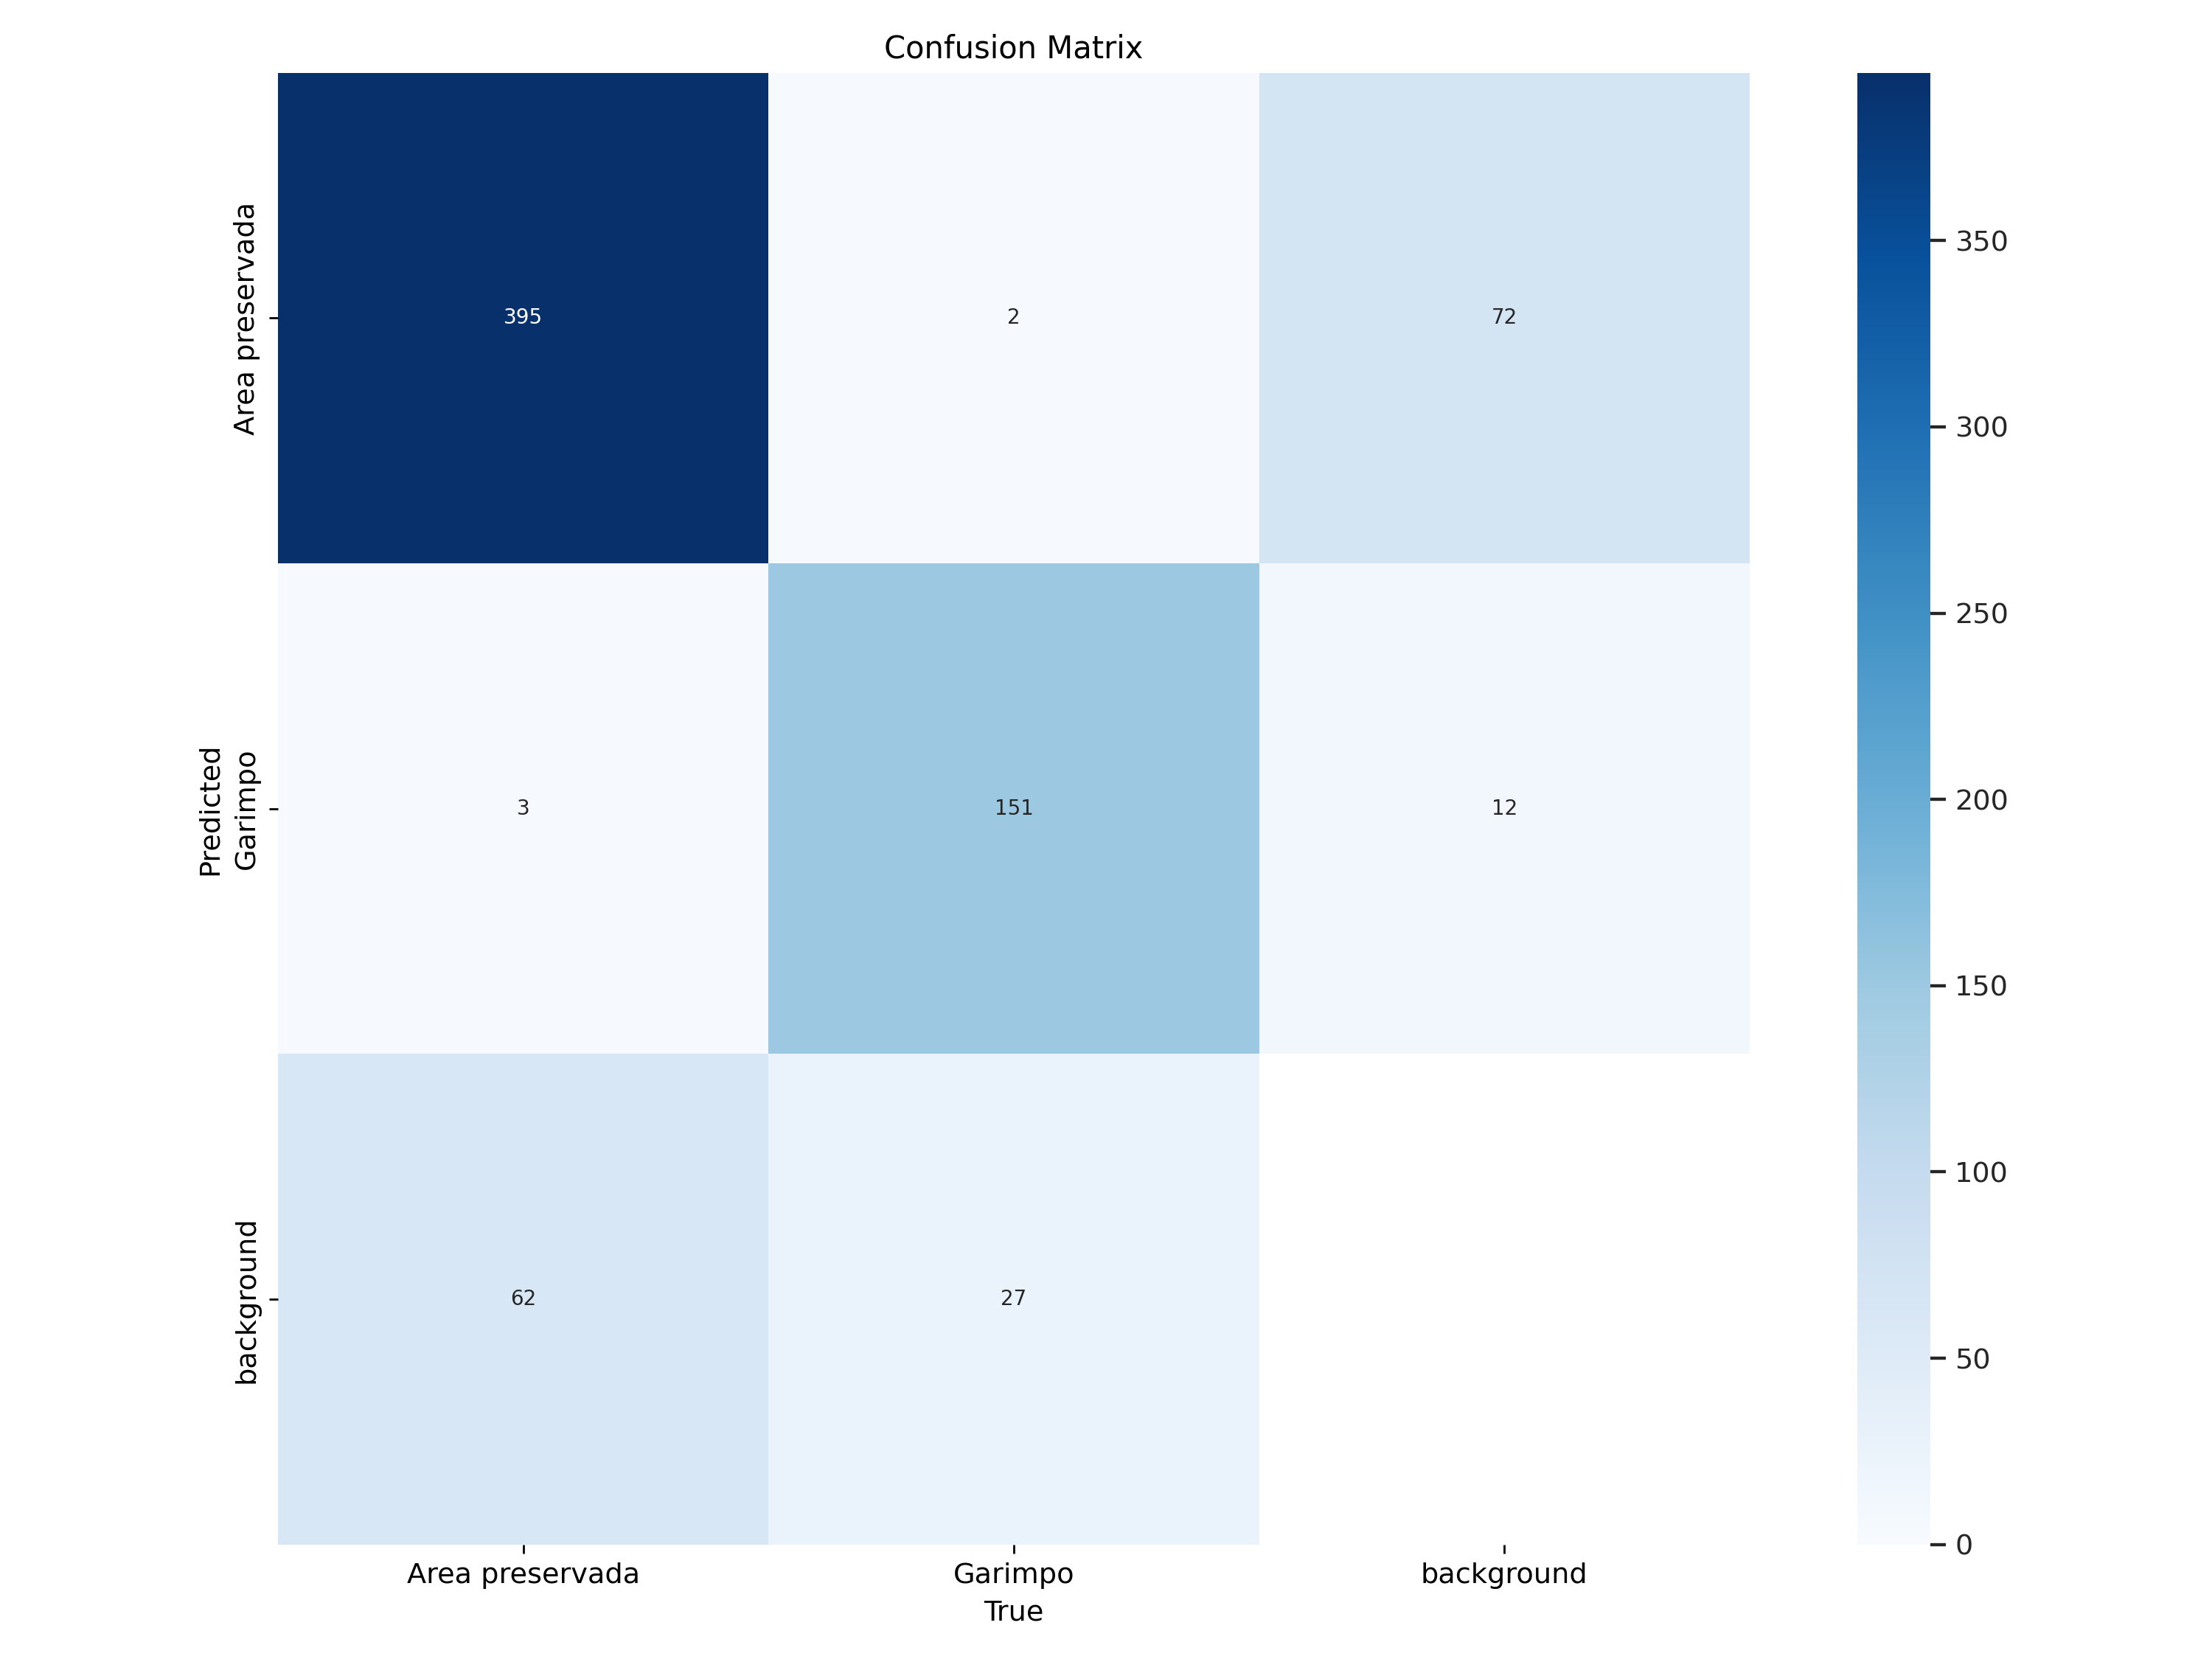

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content/drive/MyDrive/LiviaCecilia/yolov10


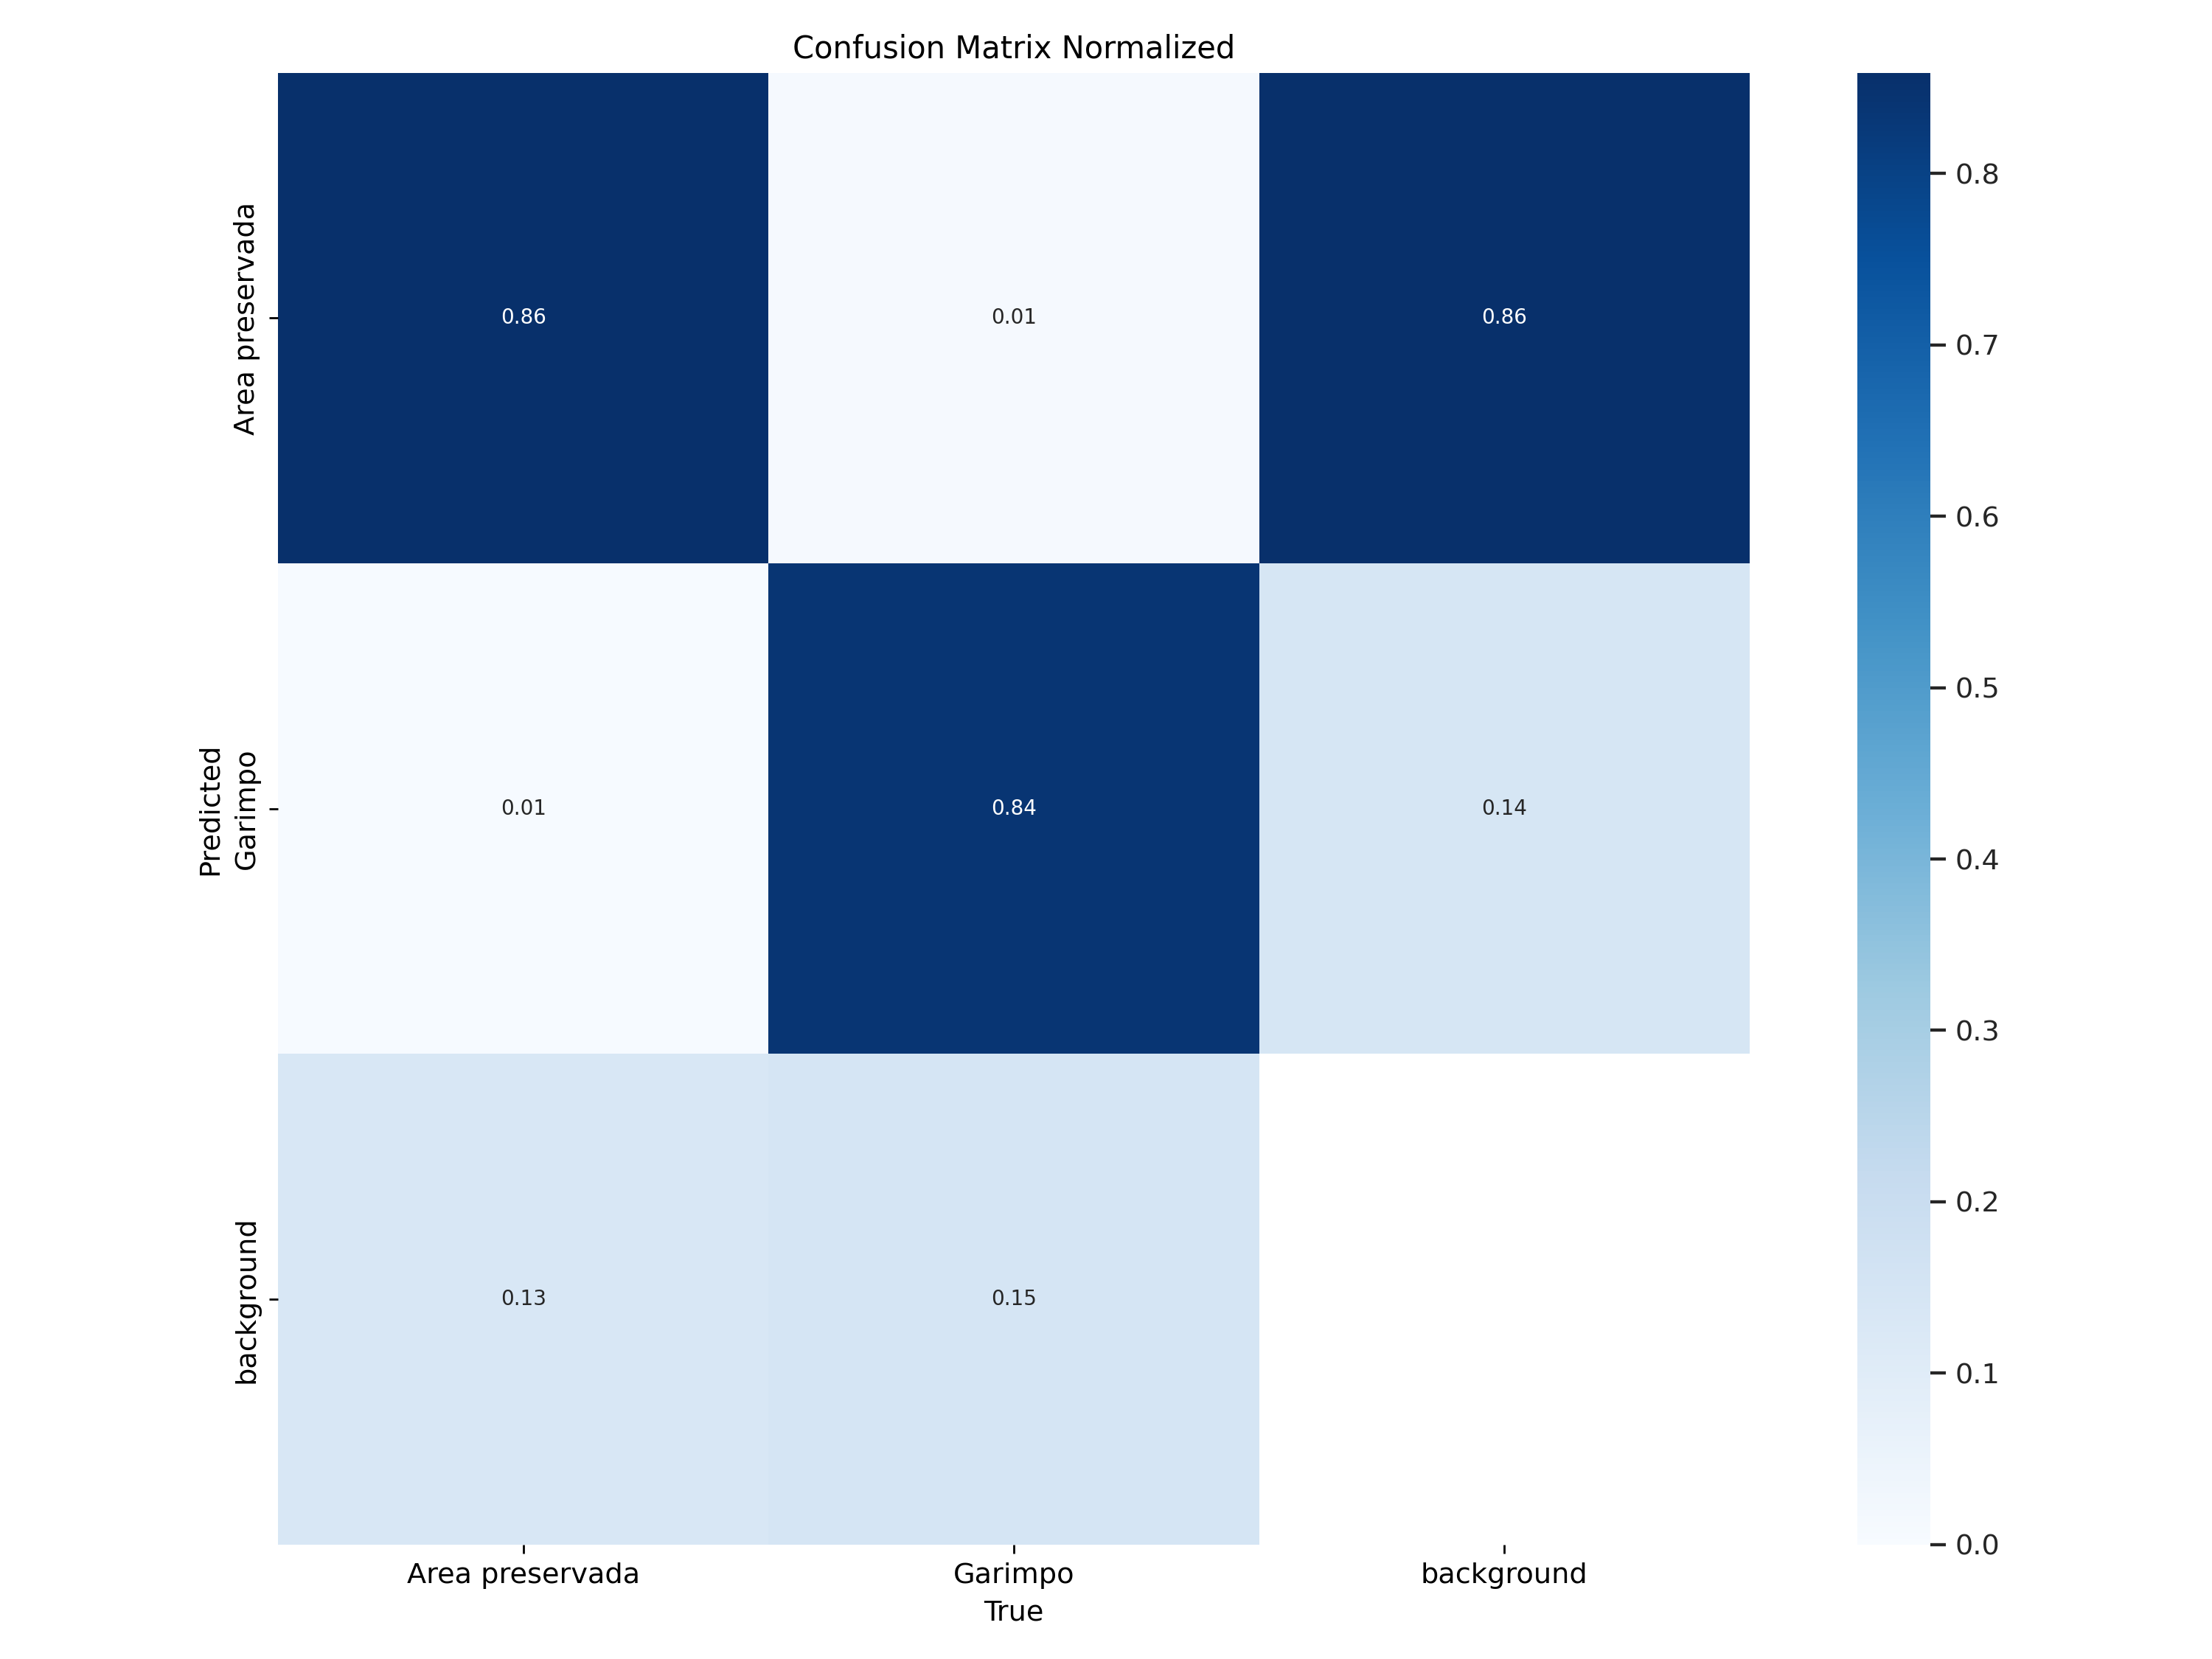

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix_normalized.png', width=600)

/content/drive/MyDrive/LiviaCecilia/yolov10


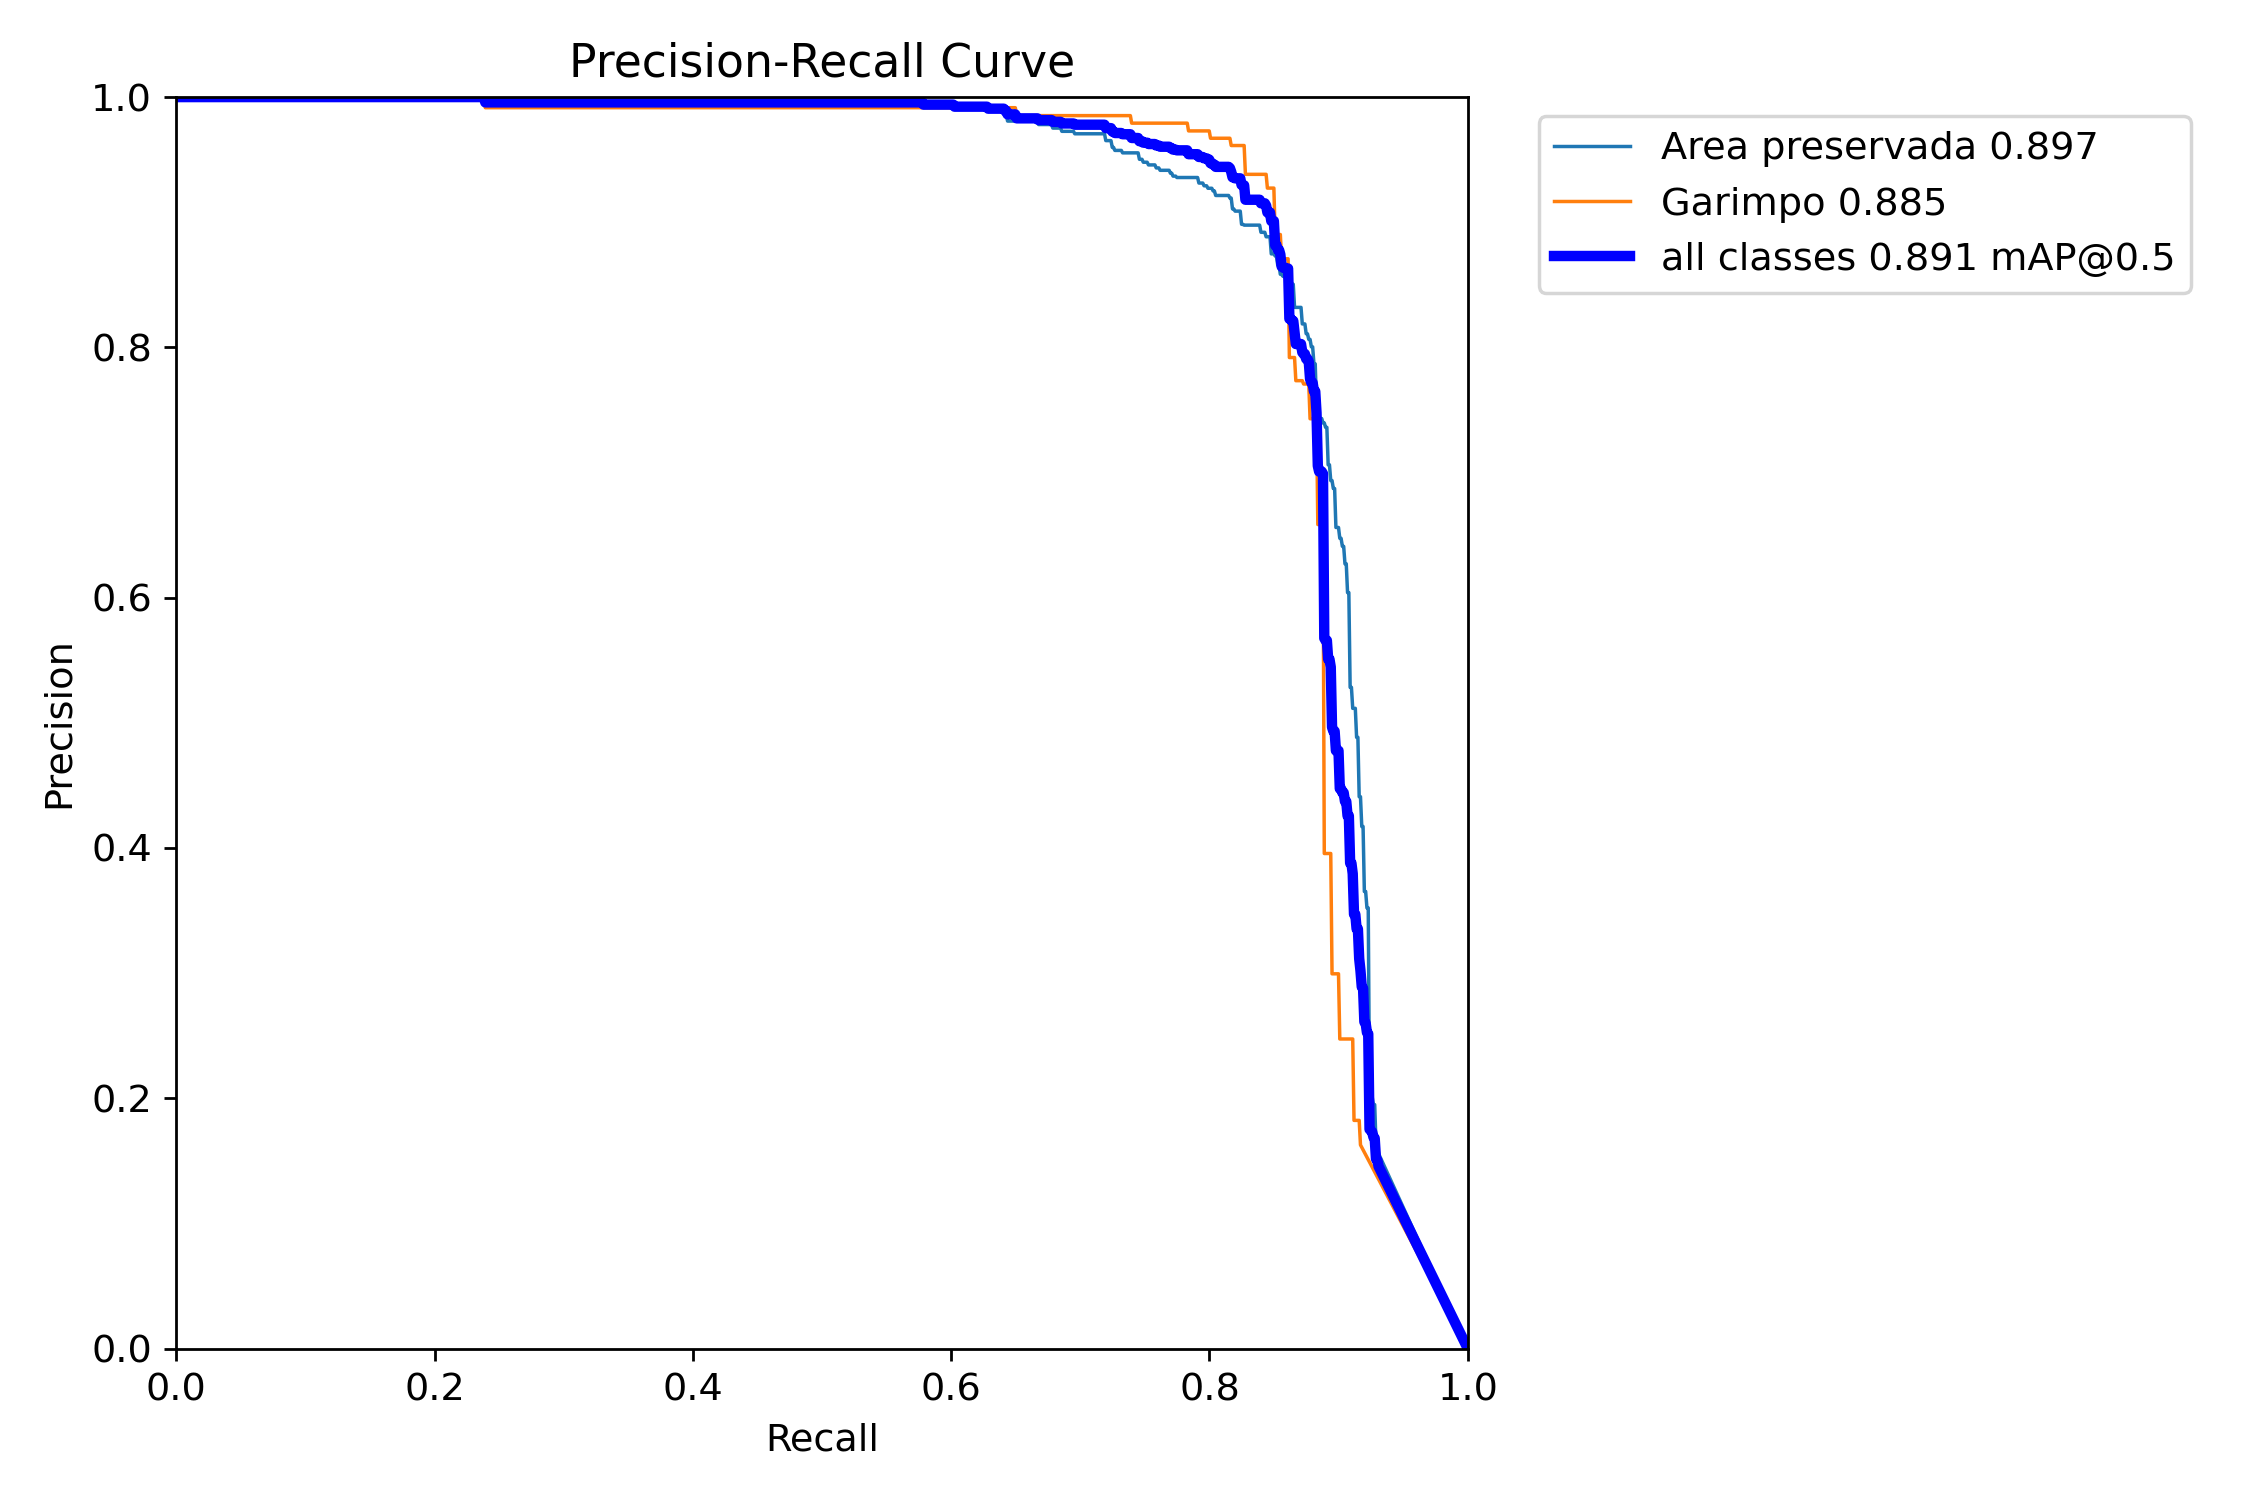

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/PR_curve.png', width=600)

/content/drive/MyDrive/LiviaCecilia/yolov10


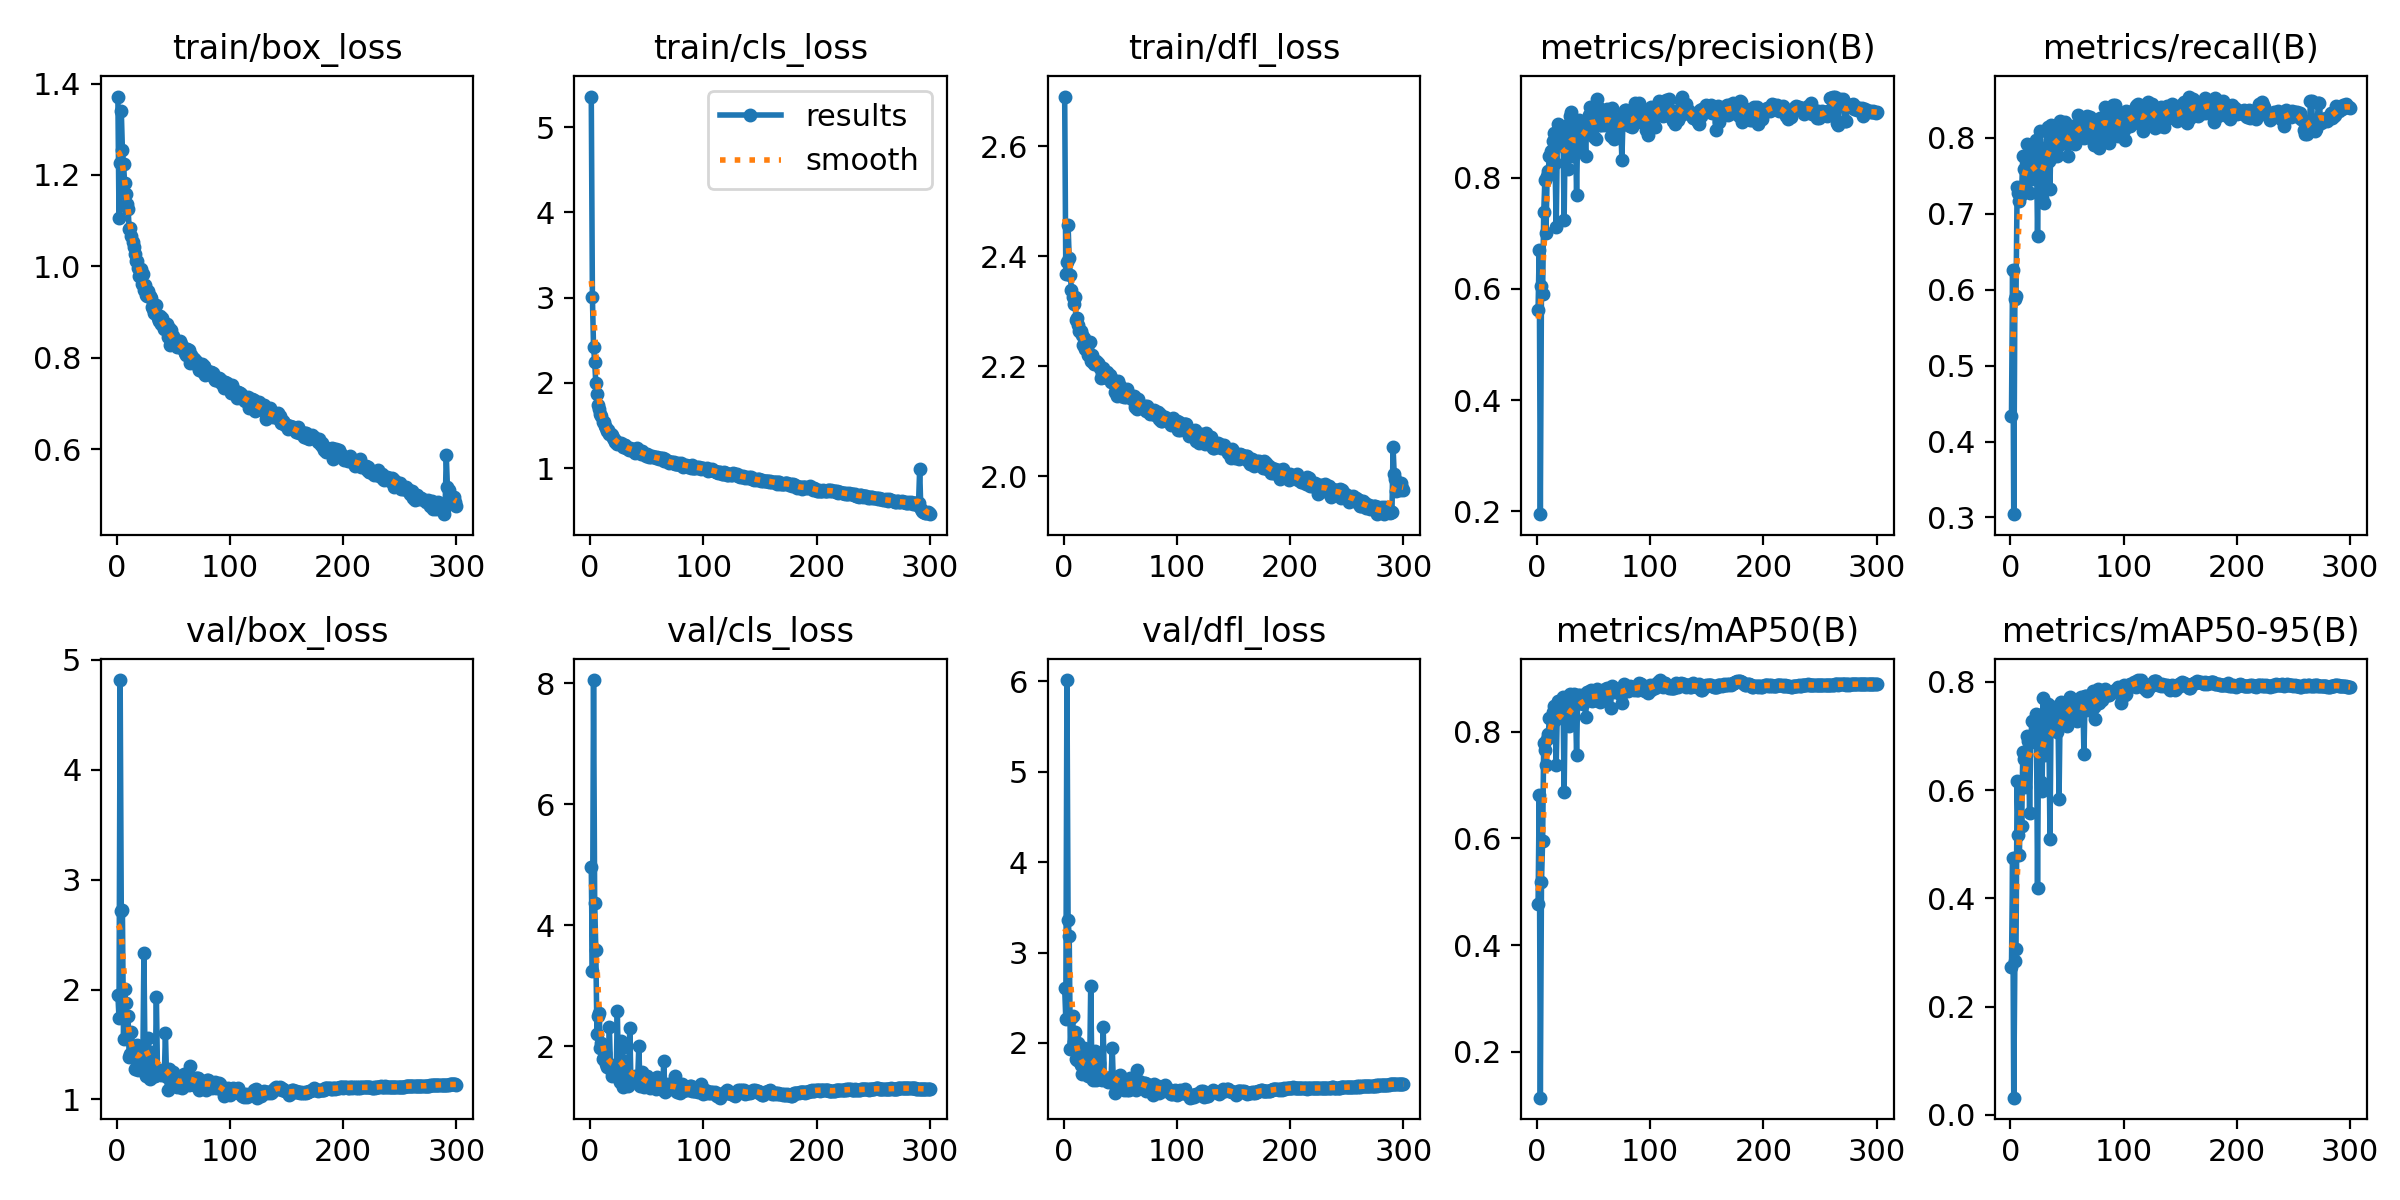

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train21/weights/best.pt conf=0.25 source=/content/drive/MyDrive/LiviaCecilia/duasimagens save=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs

image 1/5 /content/drive/MyDrive/LiviaCecilia/duasimagens/1.jpg: 384x640 3 Area preservadas, 1 Garimpo, 43.7ms
image 2/5 /content/drive/MyDrive/LiviaCecilia/duasimagens/2.jpg: 384x640 2 Area preservadas, 1 Garimpo, 10.7ms
image 3/5 /content/drive/MyDrive/LiviaCecilia/duasimagens/3.jpg: 384x640 1 Garimpo, 12.6ms
image 4/5 /content/drive/MyDrive/LiviaCecilia/duasimagens/4.jpg: 448x640 2 Area preservadas, 42.8ms
image 5/5 /content/dr

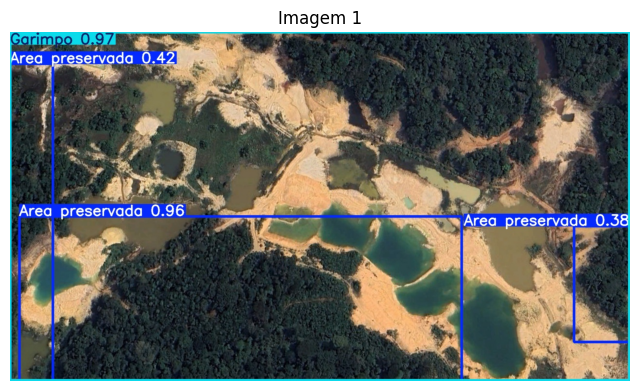

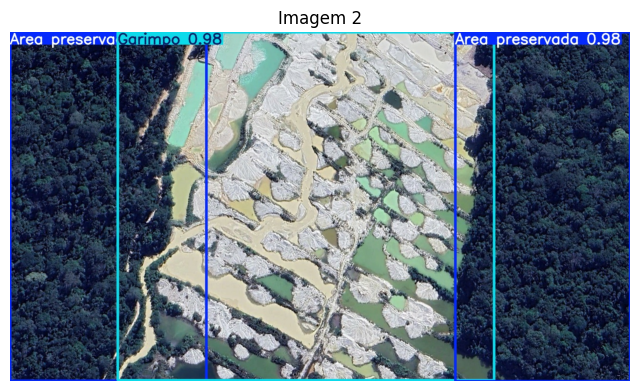

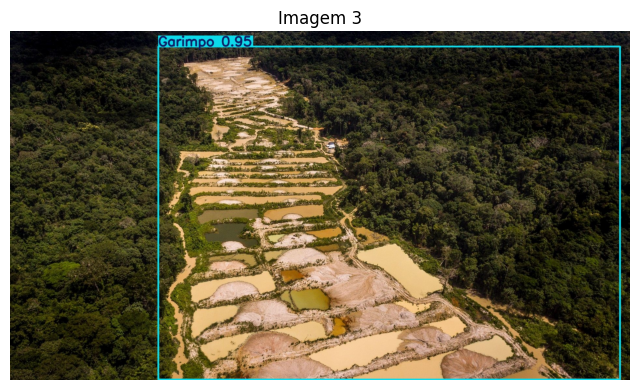

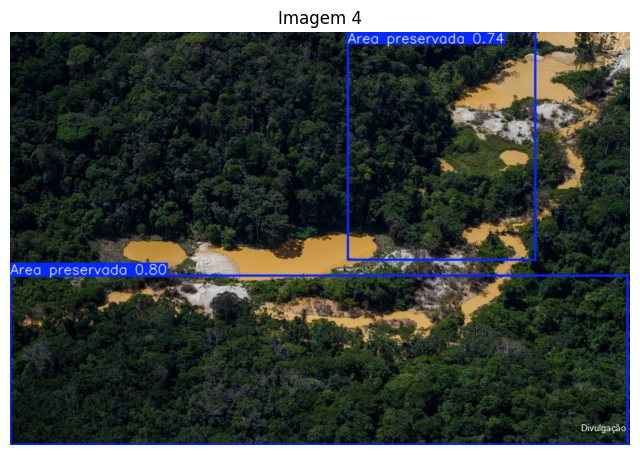

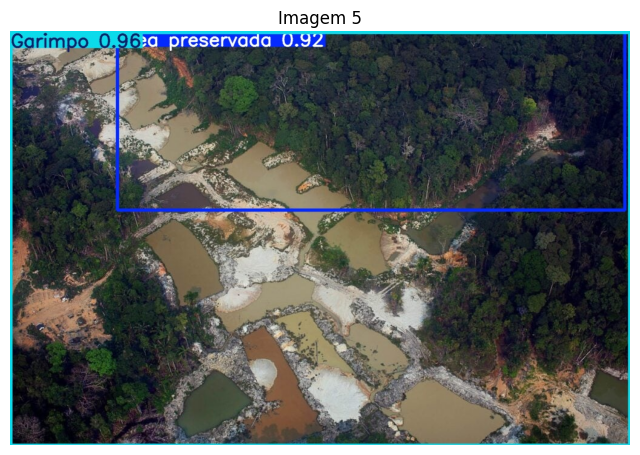

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Caminho para os resultados do YOLO
result_dir = 'runs/detect/predict15'

# Lista dos arquivos das imagens processadas
image_files = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

# Exibir cada imagem individualmente
for i, file_name in enumerate(image_files):
    img_path = os.path.join(result_dir, file_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f'Imagem {i + 1}')
    plt.axis('off')
    plt.show()


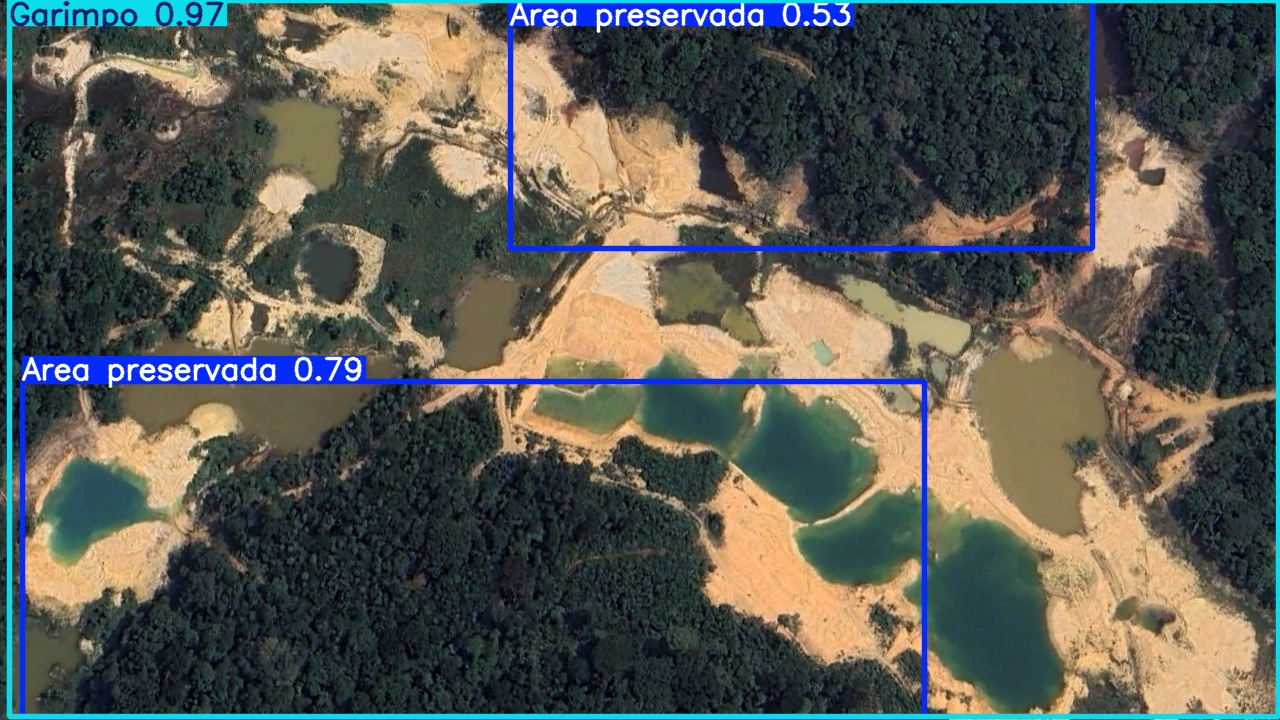

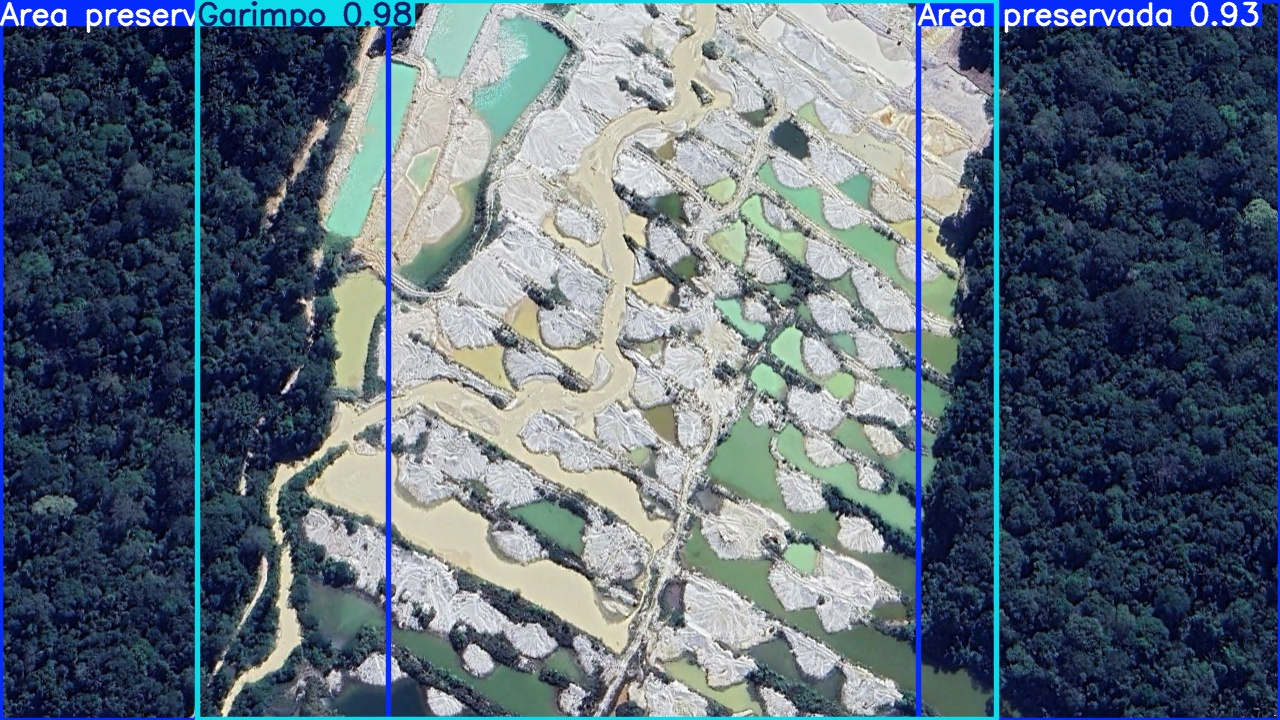

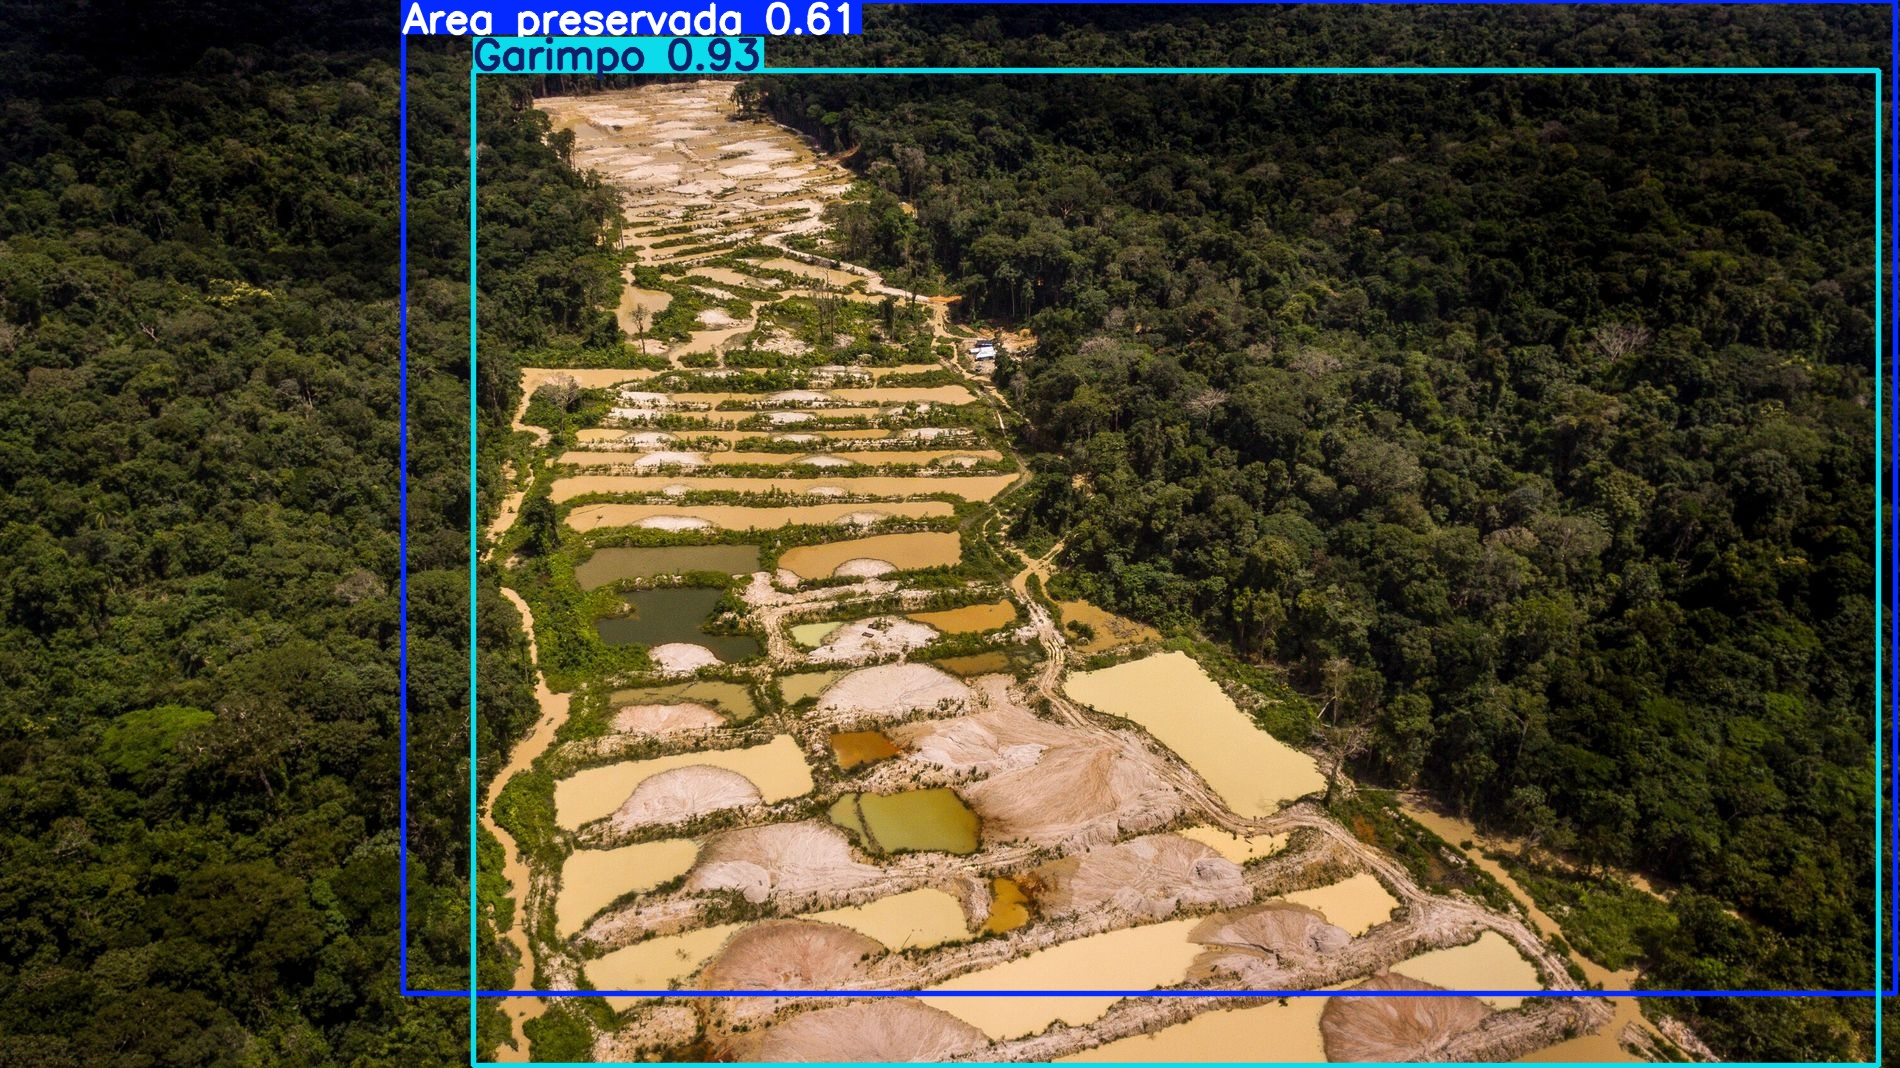

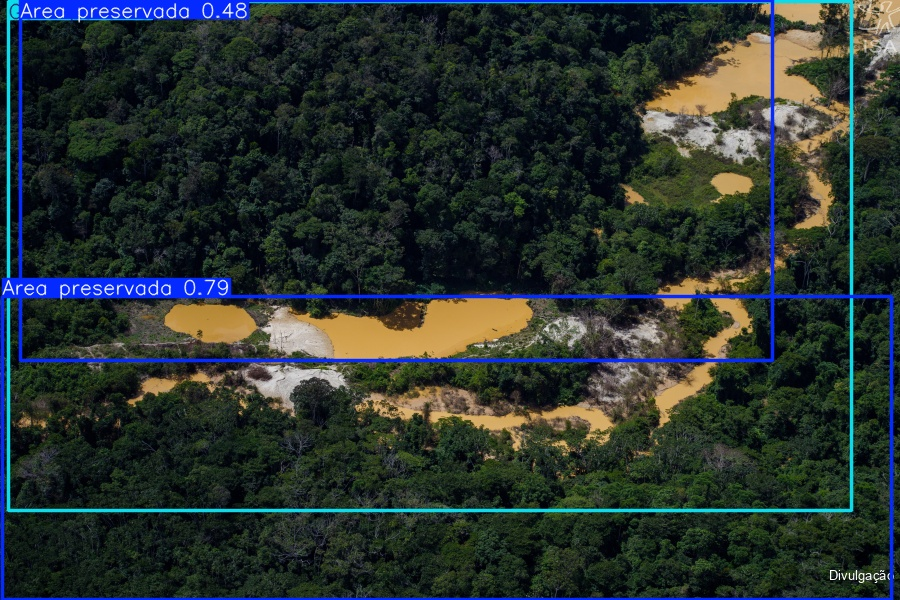

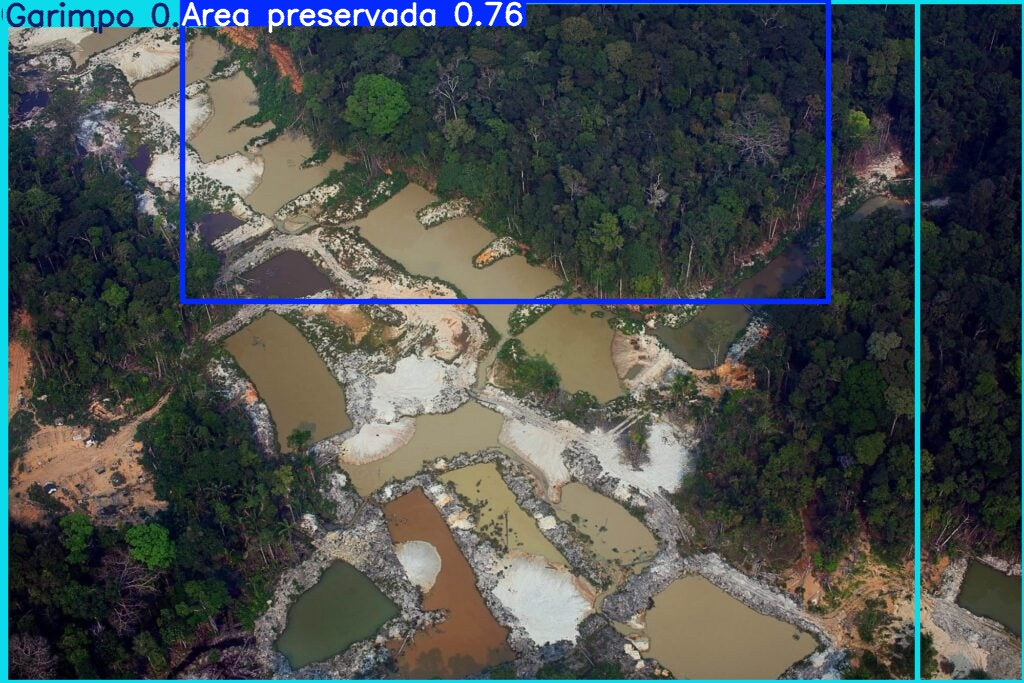

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Certifique-se de que o caminho de HOME está correto e busque o diretório mais recente
latest_folder = max(glob.glob(f'/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/predict_unique/predict2'), key=os.path.getmtime)

# Exibe as imagens processadas do diretório mais recente
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**NOTE:** Let's randomly select an image from our validation set and visualize the results.

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:

%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model=/content/drive/MyDrive/LiviaCecilia/yolov10/runs/detect/train8/weights/best.pt \
source=/content/drive/MyDrive/LiviaCecilia/Imagens_Dateset_Garimpo \
save=True

/content/drive/MyDrive/LiviaCecilia/yolov10
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_

## Deploy model on Roboflow

Once you have finished training your YOLOv10 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov10", model_path=f"{HOME}/runs/detect6/train/")

While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference